<a name = "content"> </a>
# **Лабораторная работа №4**

## Брысов Александр
### М8О-409Б-18
----

### [1. Задание](#step1)

### [2. Необходимые функции](#step2)

### [3. Аналитическое решение](#step3)

### [4. Схема переменных направлений](#step4)

### [5. Схема дробных шагов](#step5)


<a name = "step1"></a>
# Задание
[К началу](#content)

Используя схемы переменных направлений и дробных шагов, решить двумерную начально-краевую задачу для дифференциального уравнения параболического типа. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,t)$. Исследовать зависимость погрешности от сеточных параметров $\tau, h_x, h_y$.

Двумерная начально-краевая задача для дифференциального уравнения параболического типа:
$$\begin{align*} &\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} - xy\sin t,\\
&u(0,y,t) = 0,\\
&u(1,y,t) - u_x(1,y,t) = 0,\\
&u(x,0,t) = 0,\\
&u(x,1,t) - u_y(x,1,t)= 0\\
&u(x,y,0) = xy.\end{align*}$$

Аналитическое решение $U(x,y,t) = xy\cos t.$

<a name = "step2"></a>
# Необходимые функции

[К началу](#content)

In [5]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

In [6]:
def border_con_0yt(y,t):
    return 0
def border_con_lyt(y,t):
    return 0
def border_con_x0t(x,t):
    return 0
def border_con_xlt(x,t):
    return 0
def initial_con_xy0(x,y):
    return x*y
def f(x,y,t):
    return -x*y*np.sin(t)
def analytic(x,y,t):
    return x*y*np.cos(t)

In [59]:
def error_norm(U, fR):
    i = 2
    X = np.linspace(0, lx, nx)
    Y = np.linspace(0, ly, ny)
    T = list(range(0, int(U.shape[0]/2)))
    XX, YY = np.meshgrid(X, Y)
    fig = plt.figure(figsize=(10, 5))
    plt.plot(T, list(map(lambda t: np.max(np.abs(U[i*t] - np.transpose(fR(XX, YY, ht * t * i)))), T)), color = 'red')
    plt.xlabel('t')
    plt.ylabel('Error')
    plt.title(r'$\max_{t} \left|u_{approx} - u_{analytic}\right|$')
    plt.show()

In [20]:
def gridFun(iCond, bCond):
    xCond, yCond = bCond
    xlCond, xrCond = xCond
    ylCond, yrCond = yCond
    tlCond, trCond = iCond
    return np.zeros((trCond, xrCond, yrCond))

In [21]:
def fill_border_con(intl_con, brdr_con, nt, nx, ny, hx, hy, alpha1, alpha2, betta1, betta2): 
    b1 = 1
    c1 = 0
    b2 = 1
    c2 = 0

    aN1 = -betta1 / hx
    bN1 = alpha1 + betta1 / hx
    aN2 = -betta2 / hy
    bN2 = alpha2 + betta2 / hy

    uxy0 = intl_con
    xCond, yCond = brdr_con
    u0yt, ulyt = xCond
    ux0t, uxlt = yCond

    U = gridFun((0, nt), ((0, nx), (0, ny)))

    i = 2

    for m in range(nx):
        for n in range(ny):
            U[0][m][n] = uxy0(m * hx, n * hy)
    
    return aN1, bN1, aN2, bN2, u0yt, ulyt, ux0t, uxlt, b1, c1, b2, c2, U

In [29]:
def tm_solver(nx, ny, nt, ht, hy, getA1, getB1, getA2, getB2, aN1, bN1, b1, c1, U):
    for k in range(0, nt - i, i):
        for n in range(1, ny - 1):
            A1 = getA1(k, n)
            B1 = getB1(k, n)
            U[int(k + i / 2), :, n] = np.linalg.solve(A1, B1)[:, 0]
        for m in range(1, nx - 1):
            A2 = getA2(k, m)
            B2 = getB2(k, m)
            U[k + i, m, :] = np.linalg.solve(A2, B2)[:, 0]
        for n in range(0, ny):
            U[k + i][0][n] = (u0yt(n * hy, (k + i) * ht) - c1 * U[k + i][1][n]) / b1
            U[k + i][nx - 1][n] = (ulyt(n * hy, (k + i) * ht) - aN1 * U[k + i][nx - 2][n]) / bN1
    return U

<a name = "step3"></a>
# Аналитическое решение

[К началу](#content)

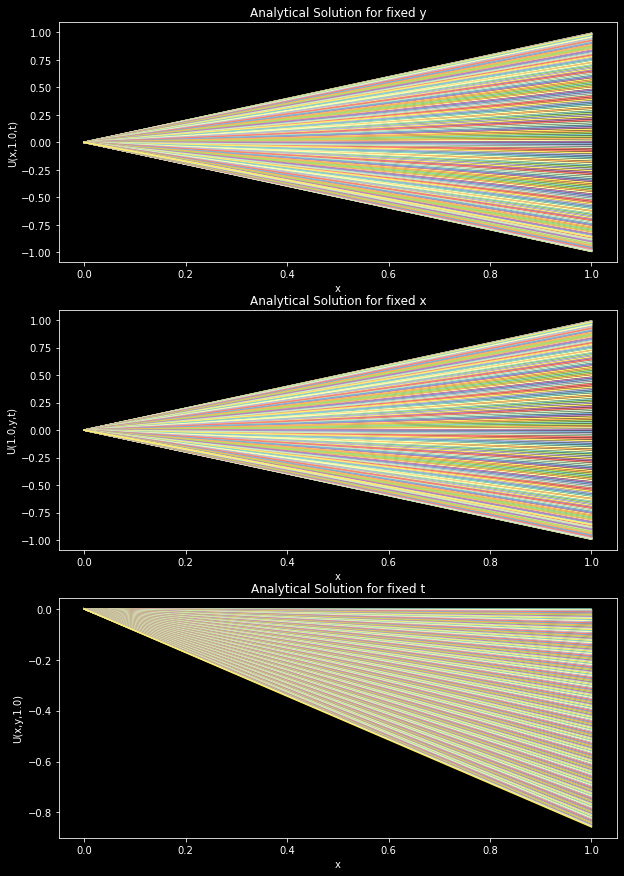

In [8]:
lx = 1
ly = 1
lt = 10

nx = 200
ny = 200
nt = 200
hx = lx / nx
hy = ly / ny
ht = lt / nt

X = np.linspace(0, lx, nx)
Y = np.linspace(0, ly, ny)
T = np.linspace(0, ly, ny)

u_anlt = np.zeros((nt,ny,nx))
for k in range(nt):
    for s in range(ny):
        for j in range(nx):
            u_anlt[k][s][j] = analytic(j * hx, s * hy, k * ht)

fig = plt.figure(figsize=(10, 15))
plt.subplot(3,1,1)
plt.xlabel('x')
plt.ylabel(f'U(x,{Y[-1]},t)')
plt.title(f'Analytical Solution for fixed y')
for k in range(len(u_anlt)):
    plt.plot(X, u_anlt[k][-1])
plt.subplot(3,1,2)
plt.xlabel('x')
plt.ylabel(f'U({X[-1]},y,t)')
plt.title(f'Analytical Solution for fixed x')
for k in range(len(u_anlt)):
    plt.plot(Y, u_anlt[k][:][-1])
plt.subplot(3,1,3)
plt.xlabel('x')
plt.ylabel(f'U(x,y,{T[-1]})')
plt.title('Analytical Solution for fixed t')
for k in range(len(u_anlt[0])):
    plt.plot(X, u_anlt[-1][k][:])
plt.subplot(3,1,3)
plt.xlabel('x')
plt.ylabel(f'U(x,y,{T[-1]})')
plt.title('Analytical Solution for fixed t')

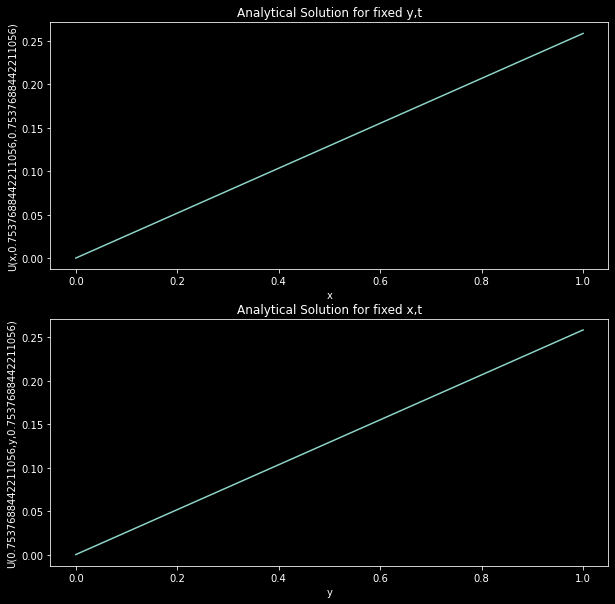

In [19]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.xlabel('x')
plt.ylabel(f'U(x,{Y[150]},{T[150]})')
plt.title(f'Analytical Solution for fixed y,t')
plt.plot(X, u_anlt[150][150])
plt.subplot(2,1,2)
plt.xlabel('y')
plt.ylabel(f'U({X[150]},y,{T[150]})')
plt.title(f'Analytical Solution for fixed x,t')
plt.plot(Y, u_anlt[150][:][150])
plt.show()

<a name = "step4"></a>
# Схема переменных направлений

[К началу](#content)

In [51]:
def AlternatingDirection(nx, ny, hx, hy, ht, aN1, bN1, aN2, bN2, u0yt, ulyt, ux0t, uxlt, U):
    aj1 = -a / hx ** 2
    bj1 = 1 / ht + 2 * a / hx ** 2
    cj1 = -a / hx ** 2

    aj2 = -b / hy ** 2
    bj2 = 1 / ht + 2 * b / hy ** 2
    cj2 = -b / hy ** 2

    def gA1(k, n):
        aa = np.zeros((nx, nx))
        aa[0][0] = b1
        aa[0][1] = c1
        for j in range(1, nx - 1):
            aa[j][j - 1] = aj1
            aa[j][j] = bj1
            aa[j][j + 1] = cj1
        aa[nx - 1][nx - 2] = aN1
        aa[nx - 1][nx - 1] = bN1
        return aa

    def gB1(k, n):
        bb = np.zeros((nx, 1))
        bb[0][0] = u0yt(n * hy, ht * (k + i))
        bb[nx - 1][0] = ulyt(n * hy, ht * (k + i))
        for m in range(1, nx - 1):
            bb[m][0] = f(m * hx, n * hy, int(k + i/2) * ht) + (1 / ht - 2*b/ hy**2) * U[k][m][n] + (b/hy**2) * (U[k][m][n + 1] + U[k][m][n - 1])
        return bb

    def gA2(k, m):
        aa = np.zeros((ny, ny))
        aa[0][0] = b2
        aa[0][1] = c2
        for j in range(1, ny - 1):
            aa[j][j - 1] = aj2
            aa[j][j] = bj2
            aa[j][j + 1] = cj2
        aa[ny - 1][ny - 2] = aN2
        aa[ny - 1][ny - 1] = bN2
        return aa

    def gB2(k, m):
        bb = np.zeros((ny, 1))
        bb[0][0] = ux0t(m * hx, ht * (k + i))
        bb[ny - 1][0] = uxlt(m * hx, ht * (k + i))
        for n in range(1, ny - 1):
            bb[n][0] = f(m * hx, n * hy, int(k + i/2) * ht) + (1 / ht - 2*a/ hx**2) * U[int(k + i/2)][m][n] + (a/hx**2) * (U[int(k + i/2)][m + 1][n] + U[int(k + i/2)][m - 1][n])
        return bb

    return (gA1, gB1), (gA2, gB2)

In [52]:
a = 1
b = 1
i = 2

lx = 1
ly = 1
lt = 10
omega = 1.5
nx = 200
ny = 200
nt = 200
eps = 0.001

alpha1 = 1
betta1 = -1
alpha2 = 1
betta2 = -1

hx = lx / nx
hy = ly / ny
ht = lt / nt

t_t = 3
y_y = 3
U = []

In [54]:
aN1, bN1, aN2, bN2, u0yt, ulyt, ux0t, uxlt, b1, c1, b2, c2, U = fill_border_con(initial_con_xy0, ((border_con_x0t, border_con_xlt), (border_con_0yt, border_con_lyt)), nt, nx, ny, hx, hy, alpha1, alpha2, betta1, betta2)
(getA1, getB1), (getA2, getB2) = AlternatingDirection(nx, ny, hx, hy, ht, aN1, bN1, aN2, bN2, u0yt, ulyt, ux0t, uxlt, U)
u_ad = tm_solver(nx, ny, nt, ht, hy, getA1, getB1, getA2, getB2, aN1, bN1, b1, c1, U)

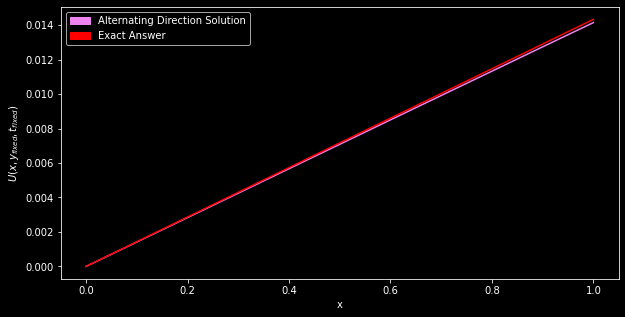

In [55]:
i = 2
fig = plt.figure(figsize=(10, 5))
#plt.subplot(1,3,1)
plt.xlabel('x')
plt.ylabel('$U(x,y_{fixed},t_{fixed})$')
a_ = mpatches.Patch(color = 'violet', label = 'Alternating Direction Solution')
b_ = mpatches.Patch(color = 'red', label = 'Exact Answer')
plt.legend(handles=[a_,b_])
plt.plot(X, u_ad[i*t_t, :, y_y], color = 'violet')
plt.plot(X, analytic(X, y_y * hy, ht * t_t * 2), color = 'red')
plt.show()

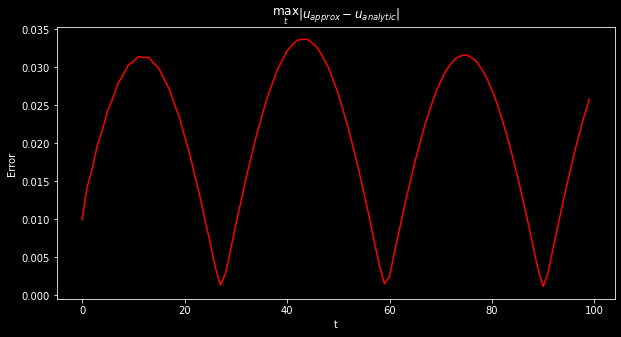

In [60]:
error_norm(u_ad, analytic)

<a name = "step5"></a>
# Схема дробных шагов

[К началу](#content)

In [62]:
def FractionSteps(nx, ny, hx, hy, ht, aN1, bN1, aN2, bN2, u0yt, ulyt, ux0t, uxlt, U):

  aj1 = -a/hx**2
  bj1 = 1/ht/2 + 2*a/hx**2
  cj1 = -a/hx**2

  aj2 = -b/hy**2
  bj2 = 1/ht/2 + 2*b/hy**2
  cj2 = -b/hy**2

  def gA1(k, n):
      aa = np.zeros((nx, nx))
      aa[0][0] = b1
      aa[0][1] = c1
      for j in range(1, nx - 1):
          aa[j][j - 1] = aj1
          aa[j][j] = bj1
          aa[j][j + 1] = cj1
      aa[nx - 1][nx - 2] = aN1
      aa[nx - 1][nx - 1] = bN1
      return aa

  def gB1(k, n):
      bb = np.zeros((nx, 1))
      bb[0][0] = u0yt(n * hy, ht * (k + i))
      bb[nx - 1][0] = ulyt(n * hy, ht * (k + i))
      for m in range(1, nx - 1):
          bb[m][0] = f(m * hx, n * hy, k * ht)/2 + U[k][m][n] / ht / 2
      return bb

  def gA2(k, m):
      aa = np.zeros((ny, ny))
      aa[0][0] = b2
      aa[0][1] = c2
      for j in range(1, ny - 1):
          aa[j][j - 1] = aj2
          aa[j][j] = bj2
          aa[j][j + 1] = cj2
      aa[ny - 1][ny - 2] = aN2
      aa[ny - 1][ny - 1] = bN2
      return aa

  def gB2(k, m):
      bb = np.zeros((ny, 1))
      bb[0][0] = ux0t(m * hx, ht * (k + i))
      bb[ny - 1][0] = uxlt(m * hx, ht * (k + i))
      for n in range(1, ny - 1):
          bb[n][0] = f(m * hx, n * hy, (k + i) * ht)/2 + U[int(k + i/2)][m][n] / ht / 2
      return bb
  return (gA1, gB1), (gA2, gB2)

In [63]:
a = 1
b = 1
i = 2

lx = 1
ly = 1
lt = 10
omega = 1.5
nx = 200
ny = 200
nt = 200
eps = 0.001

alpha1 = 1
betta1 = -1
alpha2 = 1
betta2 = -1

hx = lx / nx
hy = ly / ny
ht = lt / nt

t_t = 3
y_y = 3
U = []

In [64]:
aN1, bN1, aN2, bN2, u0yt, ulyt, ux0t, uxlt, b1, c1, b2, c2, U = fill_border_con(initial_con_xy0, ((border_con_x0t, border_con_xlt), (border_con_0yt, border_con_lyt)), nt, nx, ny, hx, hy, alpha1, alpha2, betta1, betta2)
(getA1, getB1), (getA2, getB2) = FractionSteps(nx, ny, hx, hy, ht, aN1, bN1, aN2, bN2, u0yt, ulyt, ux0t, uxlt, U)
u_fs = tm_solver(nx, ny, nt, ht, hy, getA1, getB1, getA2, getB2, aN1, bN1, b1, c1, U)

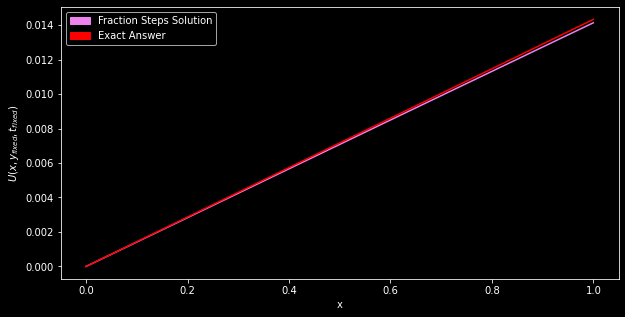

In [67]:
i = 2
fig = plt.figure(figsize=(10, 5))
#plt.subplot(1,3,1)
plt.xlabel('x')
plt.ylabel('$U(x,y_{fixed},t_{fixed})$')
a_ = mpatches.Patch(color = 'violet', label = 'Fraction Steps Solution')
b_ = mpatches.Patch(color = 'red', label = 'Exact Answer')
plt.legend(handles=[a_,b_])
plt.plot(X, u_fs[i*t_t, :, y_y], color = 'violet')
plt.plot(X, analytic(X, y_y * hy, ht * t_t * 2), color = 'red')
plt.show()

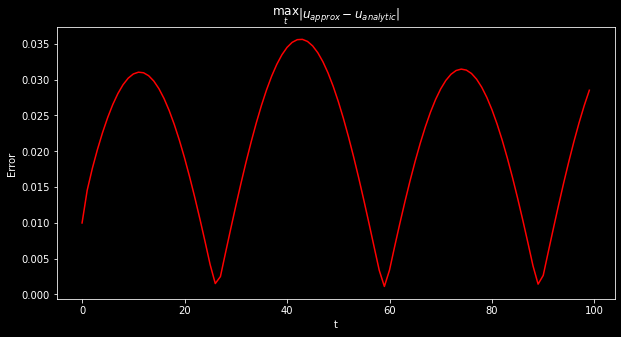

In [66]:
error_norm(u_fs, analytic)